# Introduction

# Imports

In [1]:
import numpy as np
import pandas as pd
from functions import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

# EDA

In [2]:
df = pd.read_csv(r'Data\KeplerData.csv',skiprows=76)

In [3]:
import random
random.seed(40521)

In [4]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2365 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_disp_prov      9564 non-null   object 
 11  koi_period         9564 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0          9564 non-null   float64
 14  koi_eccen          9201 non-null   float64
 15  koi_longp          0 non-null      float64
 16  koi_impact         9201 

In [6]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9201.0,...,9109.000000,9109.000000,8734.000000,8747.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,2.454999e+06,0.0,...,-0.316136,-0.165817,-0.000097,-0.000714,-0.012281,-0.045420,1.866561,-0.024244,-0.076749,1.812566
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,6.791896e+01,0.0,...,20.254777,20.534655,0.058225,0.092987,2.406550,2.573558,2.988742,2.382286,2.553758,2.986376
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,...,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,2.454966e+06,0.0,...,-0.600000,-0.680000,-0.000210,-0.000220,-0.320000,-0.387000,0.170000,-0.310000,-0.390000,0.210000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,2.454970e+06,0.0,...,-0.000500,-0.034000,0.000000,0.000000,0.000000,0.000000,0.610000,-0.004000,-0.017000,0.583000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,2.455004e+06,0.0,...,0.570000,0.500000,0.000240,0.000240,0.309000,0.300000,2.160000,0.290000,0.300000,1.970000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,2.456306e+06,0.0,...,549.500000,712.500000,1.190000,5.000000,45.680000,27.500000,88.600000,46.570000,34.000000,89.600000


In [7]:
df.koi_pdisposition.value_counts()

FALSE POSITIVE    4847
CANDIDATE         4717
Name: koi_pdisposition, dtype: int64

In [8]:
(df.koi_disposition == df.koi_pdisposition).value_counts()

True     7200
False    2364
dtype: int64

In [9]:
df_FP = df.loc[df.koi_disposition == "FALSE POSITIVE"]

In [10]:
(df_FP.koi_disposition == df_FP.koi_pdisposition).value_counts()

True     4839
False       1
dtype: int64

In [11]:
for col in df.columns:
    print(df[col].isna().value_counts())

False    9564
Name: kepid, dtype: int64
False    9564
Name: kepoi_name, dtype: int64
True     7199
False    2365
Name: kepler_name, dtype: int64
False    9564
Name: koi_disposition, dtype: int64
False    9564
Name: koi_pdisposition, dtype: int64
False    8054
True     1510
Name: koi_score, dtype: int64
False    9564
Name: koi_fpflag_nt, dtype: int64
False    9564
Name: koi_fpflag_ss, dtype: int64
False    9564
Name: koi_fpflag_co, dtype: int64
False    9564
Name: koi_fpflag_ec, dtype: int64
False    9564
Name: koi_disp_prov, dtype: int64
False    9564
Name: koi_period, dtype: int64
False    9564
Name: koi_time0bk, dtype: int64
False    9564
Name: koi_time0, dtype: int64
False    9201
True      363
Name: koi_eccen, dtype: int64
True    9564
Name: koi_longp, dtype: int64
False    9201
True      363
Name: koi_impact, dtype: int64
False    9564
Name: koi_duration, dtype: int64
True    9564
Name: koi_ingress, dtype: int64
False    9201
True      363
Name: koi_depth, dtype: int64
False    92

## Drop obvious columns (ID etc) and rows of missing data

### Initial Column Drop

In [12]:
len(df.columns)

70

In [13]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [14]:
drop_initial = ['kepid','kepler_name','koi_ingress','koi_longp','koi_sage'] #'kepoi_name' will be dropped for model

In [15]:
df_initial_drop = df.drop(drop_initial,axis=1)

In [16]:
df_initial_drop.head()

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_period,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,9.488036,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,54.418383,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00753.01,CANDIDATE,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,19.899140,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,1.736952,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,2.525592,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


### Drop rows of missing data

In [17]:
for col in df_initial_drop.columns:
    print(df_initial_drop[col].isna().value_counts())

False    9564
Name: kepoi_name, dtype: int64
False    9564
Name: koi_disposition, dtype: int64
False    9564
Name: koi_pdisposition, dtype: int64
False    8054
True     1510
Name: koi_score, dtype: int64
False    9564
Name: koi_fpflag_nt, dtype: int64
False    9564
Name: koi_fpflag_ss, dtype: int64
False    9564
Name: koi_fpflag_co, dtype: int64
False    9564
Name: koi_fpflag_ec, dtype: int64
False    9564
Name: koi_disp_prov, dtype: int64
False    9564
Name: koi_period, dtype: int64
False    9564
Name: koi_time0bk, dtype: int64
False    9564
Name: koi_time0, dtype: int64
False    9201
True      363
Name: koi_eccen, dtype: int64
False    9201
True      363
Name: koi_impact, dtype: int64
False    9564
Name: koi_duration, dtype: int64
False    9201
True      363
Name: koi_depth, dtype: int64
False    9201
True      363
Name: koi_ror, dtype: int64
False    9243
True      321
Name: koi_srho, dtype: int64
False    9564
Name: koi_fittype, dtype: int64
False    9201
True      363
Name: koi_pr

In [18]:
df_initial_drop = df_initial_drop.dropna(subset=['koi_score','koi_quarters','koi_fwm_stat_sig','koi_dicco_mra','koi_model_snr','koi_zmag','koi_fwm_sra','koi_smet','koi_gmag','koi_rmag','koi_imag'], how='any')

In [19]:
for col in df_initial_drop.columns:
    print(df_initial_drop[col].isna().value_counts())

False    6682
Name: kepoi_name, dtype: int64
False    6682
Name: koi_disposition, dtype: int64
False    6682
Name: koi_pdisposition, dtype: int64
False    6682
Name: koi_score, dtype: int64
False    6682
Name: koi_fpflag_nt, dtype: int64
False    6682
Name: koi_fpflag_ss, dtype: int64
False    6682
Name: koi_fpflag_co, dtype: int64
False    6682
Name: koi_fpflag_ec, dtype: int64
False    6682
Name: koi_disp_prov, dtype: int64
False    6682
Name: koi_period, dtype: int64
False    6682
Name: koi_time0bk, dtype: int64
False    6682
Name: koi_time0, dtype: int64
False    6682
Name: koi_eccen, dtype: int64
False    6682
Name: koi_impact, dtype: int64
False    6682
Name: koi_duration, dtype: int64
False    6682
Name: koi_depth, dtype: int64
False    6682
Name: koi_ror, dtype: int64
False    6682
Name: koi_srho, dtype: int64
False    6682
Name: koi_fittype, dtype: int64
False    6682
Name: koi_prad, dtype: int64
False    6682
Name: koi_sma, dtype: int64
False    6682
Name: koi_incl, dtype: in

## Plots of Some Best Features After Modeling

In [20]:
len(df_initial_drop.columns)

65

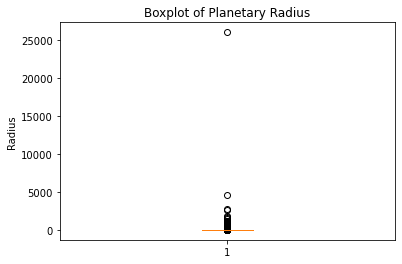

In [21]:
fig1,ax = plt.subplots()
plt.boxplot(df_initial_drop.koi_prad);
plt.title("Boxplot of Planetary Radius")
plt.ylabel("Radius");

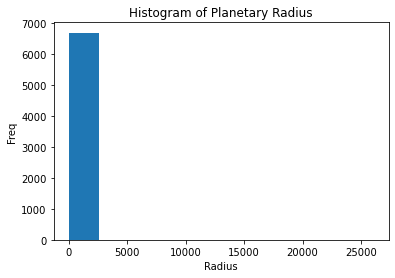

In [22]:
plt.hist(df_initial_drop.koi_prad);
plt.title("Histogram of Planetary Radius")
plt.xlabel("Radius")
plt.ylabel("Freq");

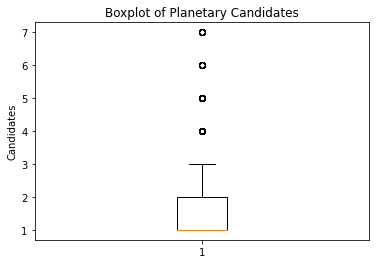

In [23]:
plt.boxplot(df_initial_drop.koi_count)
plt.title("Boxplot of Planetary Candidates")
plt.ylabel("Candidates");

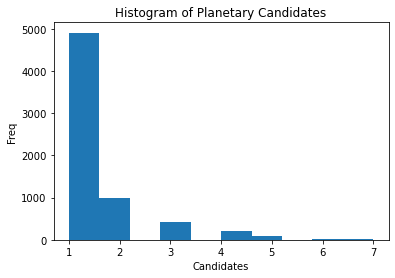

In [24]:
plt.hist(df_initial_drop.koi_count)
plt.title("Histogram of Planetary Candidates")
plt.xlabel("Candidates")
plt.ylabel("Freq");

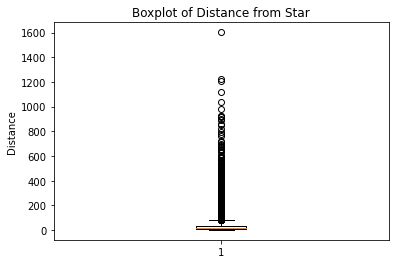

In [151]:
plt.boxplot(df_initial_drop.koi_dor)
plt.title("Boxplot of Distance from Star")
plt.ylabel('Distance');

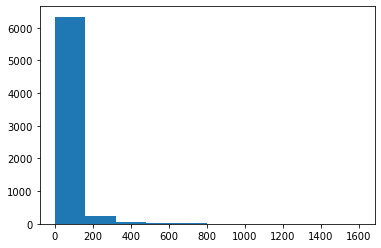

In [26]:
plt.hist(df_initial_drop.koi_dor);

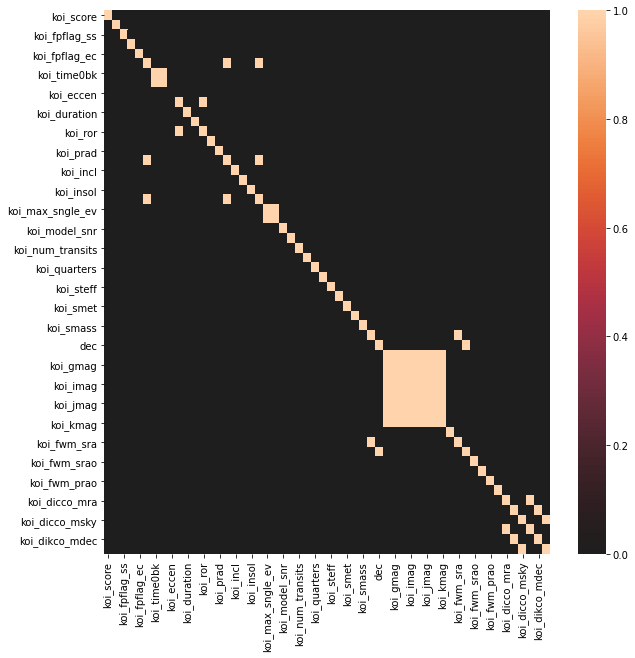

In [27]:
fig,hs = plt.subplots(figsize=(10,10))
sns.heatmap(df_initial_drop.corr()>.75, center=0);

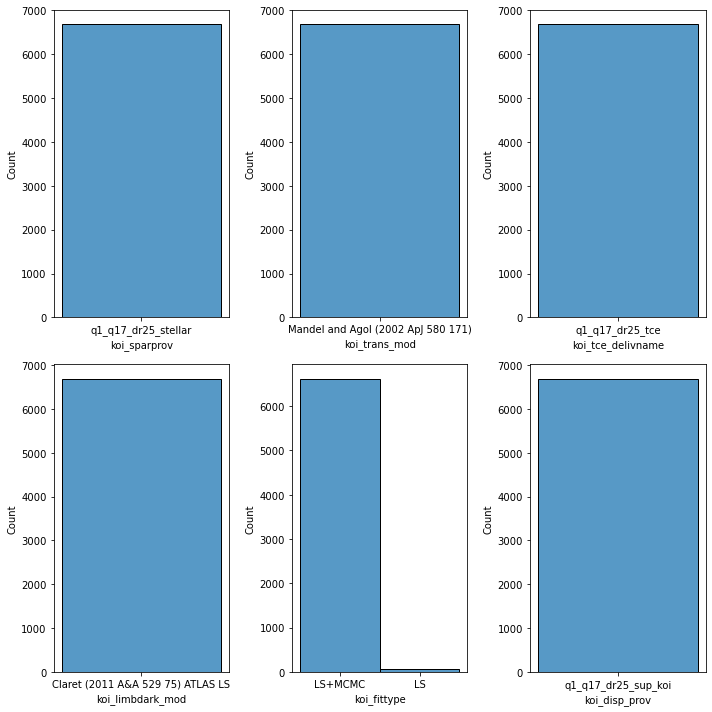

In [28]:
add_drops = ['koi_sparprov','koi_trans_mod','koi_tce_delivname','koi_limbdark_mod','koi_fittype','koi_disp_prov']
dropped_df = df_initial_drop.loc[:,add_drops]
fig, axes = plt.subplots(figsize=(10,10),nrows=2,ncols=3)
for i in range(len(add_drops)):
    row = i%3
    col = i//3
    axis = axes[col,row]
    name = add_drops[i]
    sns.histplot(dropped_df,x=name,ax=axis)
    plt.tight_layout()

In [29]:
add_drops = ['koi_sparprov','koi_trans_mod','koi_tce_delivname','koi_limbdark_mod','koi_fittype','koi_disp_prov']
df_initial_drop = df_initial_drop.drop(add_drops,axis=1)

In [30]:
df_initial_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 9563
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kepoi_name        6682 non-null   object 
 1   koi_disposition   6682 non-null   object 
 2   koi_pdisposition  6682 non-null   object 
 3   koi_score         6682 non-null   float64
 4   koi_fpflag_nt     6682 non-null   int64  
 5   koi_fpflag_ss     6682 non-null   int64  
 6   koi_fpflag_co     6682 non-null   int64  
 7   koi_fpflag_ec     6682 non-null   int64  
 8   koi_period        6682 non-null   float64
 9   koi_time0bk       6682 non-null   float64
 10  koi_time0         6682 non-null   float64
 11  koi_eccen         6682 non-null   float64
 12  koi_impact        6682 non-null   float64
 13  koi_duration      6682 non-null   float64
 14  koi_depth         6682 non-null   float64
 15  koi_ror           6682 non-null   float64
 16  koi_srho          6682 non-null   float64


In [31]:
df_initial_drop.koi_disposition.value_counts()

FALSE POSITIVE    2938
CONFIRMED         2155
CANDIDATE         1589
Name: koi_disposition, dtype: int64

## EDA Results

* Using 55 initial features for modeling
* Several features contain outliers, plan will be to use a robust scaler to scale the outliers
* A few features are also multicollinear, removing from model
* Will remove candidates to predict at the end of the model
* Target Variable: koi_disposition
* Classes in target variable are close in weight, not planning on any balancing

# Build initial model with pipeline and log regression

## Removing Candidates from Data

* Will be using final model to predict if Confirmed or False Positive at end

In [32]:
candidates_df = df_initial_drop.loc[df_initial_drop['koi_disposition'] == 'CANDIDATE']
df_processed = df_initial_drop.loc[df_initial_drop['koi_disposition'] != 'CANDIDATE']

In [33]:
len(candidates_df)

1589

In [34]:
len(df_processed)

5093

In [35]:
df_processed.koi_disposition.value_counts()

FALSE POSITIVE    2938
CONFIRMED         2155
Name: koi_disposition, dtype: int64

## Train Test Data

In [36]:
X = df_processed.drop(['koi_disposition','koi_pdisposition','kepoi_name'],axis=1)
y = df_processed['koi_disposition']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Initial Logistic Regression Model

In [38]:
initial_pipeline = Pipeline([('ss', StandardScaler()),
                            ('log',LogisticRegression(random_state=40521))])

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.99      0.99      0.99      1749
FALSE POSITIVE       1.00      1.00      1.00      2325

      accuracy                           1.00      4074
     macro avg       1.00      1.00      1.00      4074
  weighted avg       1.00      1.00      1.00      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.97      0.99      0.98       406
FALSE POSITIVE       0.99      0.98      0.99       613

      accuracy                           0.98      1019
     macro avg       0.98      0.98      0.98      1019
  weighted avg       0.98      0.98      0.98      1019

********************************************************



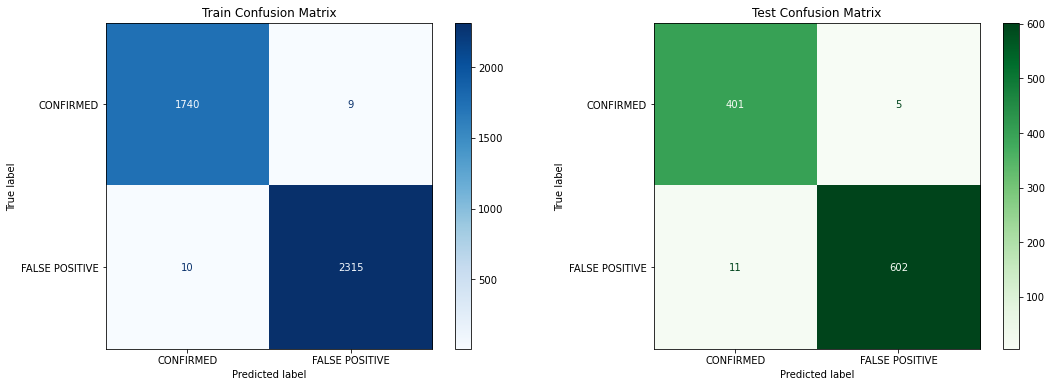

In [39]:
initial_model = run_class_model(initial_pipeline, X_train, y_train, X_test, y_test)

### Initial Findings/Results

* Performs well for an initial model, primarily looking for accuracy
* Model is able to predict too well.  After further investigation, there are columns included in the model
  which are already used to calculate the disposition (target variable) and should be removed

In [40]:
df_processed.head()

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
8,K00114.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,132.250530,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


# Confounding Features Removal and Initial Model Rebuild

In [41]:
X.columns

Index(['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_eccen',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_ror', 'koi_srho',
       'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor',
       'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_count',
       'koi_num_transits', 'koi_tce_plnt_num', 'koi_quarters',
       'koi_bin_oedp_sig', 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad',
       'koi_smass', 'ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag',
       'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag',
       'koi_fwm_stat_sig', 'koi_fwm_sra', 'koi_fwm_sdec', 'koi_fwm_srao',
       'koi_fwm_sdeco', 'koi_fwm_prao', 'koi_fwm_pdeco', 'koi_dicco_mra',
       'koi_dicco_mdec', 'koi_dicco_msky', 'koi_dikco_mra', 'koi_dikco_mdec',
       'koi_dikco_msky'],
      dtype='object')

In [42]:
c_features = ['koi_score','koi_max_mult_ev','koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_ror',
              'ra','dec','koi_kepmag','koi_gmag','koi_hmag','koi_imag','koi_jmag','koi_kmag','koi_zmag','koi_dikco_msky',
             'koi_dicco_mra','koi_dicco_mdec','koi_dicco_msky','koi_time0','koi_time0bk','koi_srad'            
             ]
df_revised = df_processed.drop(c_features,axis=1)
candidates_revised = candidates_df.drop(c_features,axis=1)

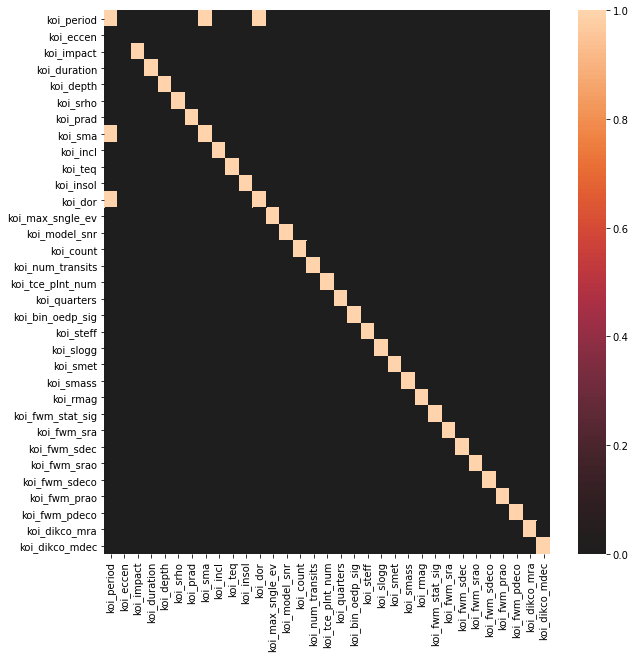

In [43]:
fig,hs = plt.subplots(figsize=(10,10))
sns.heatmap(df_revised.corr()>.75, center=0);

## Train Test Data Rebuilt

In [44]:
X_r = df_revised.drop(['koi_disposition','koi_pdisposition','kepoi_name'],axis=1)
y_r = df_revised['koi_disposition']

In [45]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2)

In [46]:
y_r.value_counts()

FALSE POSITIVE    2938
CONFIRMED         2155
Name: koi_disposition, dtype: int64

In [47]:
len(X_r.columns)

33

## Remodel

In [48]:
remodel_pipeline = Pipeline([('ss', StandardScaler()),
                            ('log',LogisticRegression(random_state=40521))])

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.88      0.89      0.88      1719
FALSE POSITIVE       0.92      0.91      0.91      2355

      accuracy                           0.90      4074
     macro avg       0.90      0.90      0.90      4074
  weighted avg       0.90      0.90      0.90      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.88      0.86      0.87       436
FALSE POSITIVE       0.90      0.91      0.90       583

      accuracy                           0.89      1019
     macro avg       0.89      0.88      0.89      1019
  weighted avg       0.89      0.89      0.89      1019

********************************************************



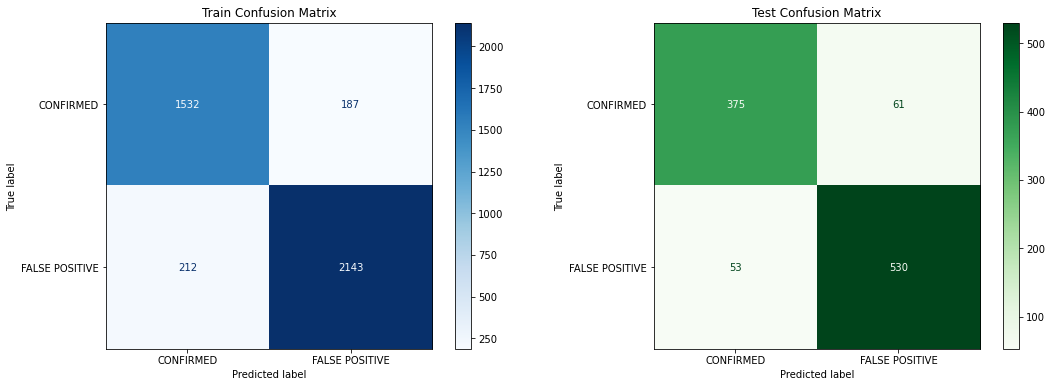

In [49]:
remodel = run_class_model(remodel_pipeline, X_train_r, y_train_r, X_test_r, y_test_r)

### Remodeled Findings

* Model performed worse overall which was expected
* Base Model Accuracy is 89%

# List of models
* Logistic Regression
* K Nearest Neighbors
* Gaussian Naive Bayes
* Random Forest
* ADA Boost
* Gradient Boost
* XG Boost
* Support Vector Machines

## Model 1 - Logistic Regression

In [50]:
log_pipe = Pipeline([('ss', StandardScaler()),
                     ('log', LogisticRegression(random_state=40521))])
log_grid = [{'log__C': [0,10],
             'log__solver': ['newton-cg','sag','saga','lbfgs','liblinear']}]

In [51]:
log_gridsearch = GridSearchCV(estimator=log_pipe,
                              param_grid=log_grid,
                              scoring='accuracy',
                              cv=5)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.88      0.90      0.89      1719
FALSE POSITIVE       0.93      0.91      0.92      2355

      accuracy                           0.91      4074
     macro avg       0.90      0.91      0.90      4074
  weighted avg       0.91      0.91      0.91      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.87      0.88      0.87       436
FALSE POSITIVE       0.91      0.90      0.90       583

      accuracy                           0.89      1019
     macro avg       0.89      0.89      0.89      1019
  weighted avg       0.89      0.89      0.89      1019

********************************************************



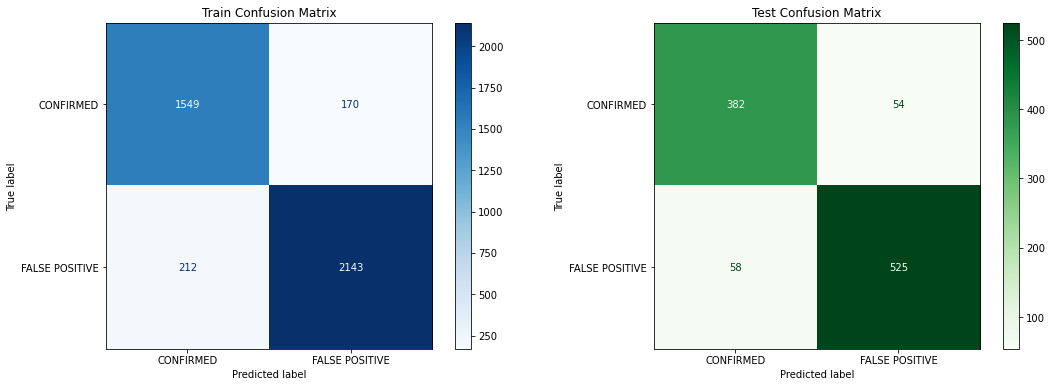

In [52]:
gslog_model = run_class_model(log_gridsearch, X_train_r, y_train_r, X_test_r, y_test_r)

In [53]:
gslog_model.best_params_

{'log__C': 10, 'log__solver': 'newton-cg'}

In [54]:
accuracy_score(y_test_r, gslog_model.predict(X_test_r))

0.8900883218842002

### Logistic Results

* Performs roughly the same as the base log model

## Model 2 - KNN

In [55]:
knn_pipe = Pipeline([('rb', RobustScaler()),#('ss', StandardScaler()),
                     ('knn', KNeighborsClassifier())])
knn_grid = [{'knn__n_neighbors': [2,5],
             'knn__weights' : ['uniform', 'distance'],
             'knn__leaf_size': [30,50]           
            }]

In [56]:
knn_gridsearch = GridSearchCV(estimator=knn_pipe,
                              param_grid=knn_grid,
                              scoring='accuracy',
                              cv=5)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       1.00      1.00      1.00      1719
FALSE POSITIVE       1.00      1.00      1.00      2355

      accuracy                           1.00      4074
     macro avg       1.00      1.00      1.00      4074
  weighted avg       1.00      1.00      1.00      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.88      0.96      0.92       436
FALSE POSITIVE       0.97      0.90      0.93       583

      accuracy                           0.92      1019
     macro avg       0.92      0.93      0.92      1019
  weighted avg       0.93      0.92      0.92      1019

********************************************************



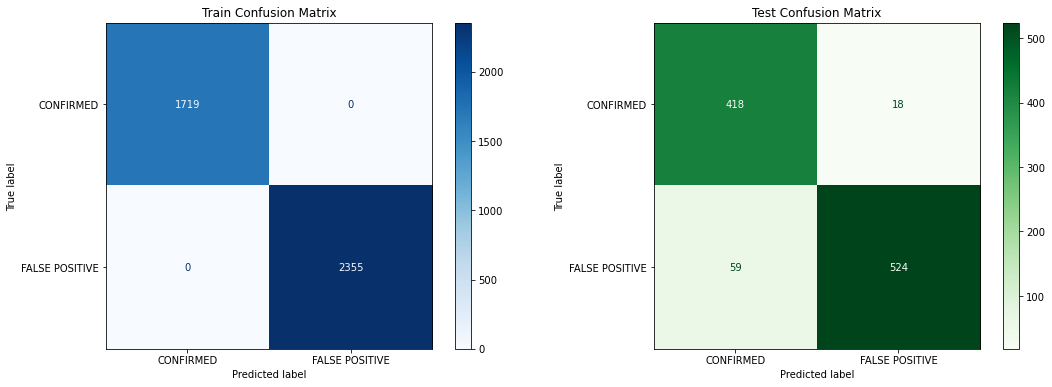

In [57]:
gsknn_model = run_class_model(knn_gridsearch, X_train_r, y_train_r, X_test_r, y_test_r)

In [58]:
gsknn_model.best_params_

{'knn__leaf_size': 30, 'knn__n_neighbors': 2, 'knn__weights': 'distance'}

In [117]:
knn_grid2 = [{'knn__n_neighbors': [3,5],
             'knn__weights' : ['uniform', 'distance'],
             'knn__leaf_size': [40,50]           
            }]

In [118]:
knn_gridsearch2 = GridSearchCV(estimator=knn_pipe,
                              param_grid=knn_grid2,
                              scoring='accuracy',
                              cv=5)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.91      0.98      0.94      1719
FALSE POSITIVE       0.99      0.93      0.96      2355

      accuracy                           0.95      4074
     macro avg       0.95      0.95      0.95      4074
  weighted avg       0.95      0.95      0.95      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.87      0.97      0.92       436
FALSE POSITIVE       0.98      0.89      0.93       583

      accuracy                           0.93      1019
     macro avg       0.92      0.93      0.93      1019
  weighted avg       0.93      0.93      0.93      1019

********************************************************



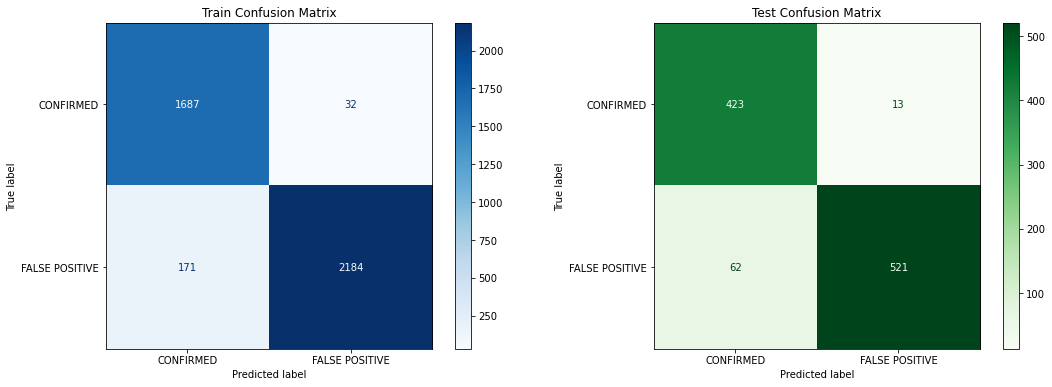

In [119]:
gsknn_model2 = run_class_model(knn_gridsearch2, X_train_r, y_train_r, X_test_r, y_test_r)

In [120]:
gsknn_model2.best_params_

{'knn__leaf_size': 40, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

### KNN Results

* Too overfit
* Reducing overfit does not improve the test performance substantially.

## Gaussian Naive Bayes

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.85      0.97      0.91      1719
FALSE POSITIVE       0.98      0.87      0.92      2355

      accuracy                           0.92      4074
     macro avg       0.91      0.92      0.91      4074
  weighted avg       0.92      0.92      0.92      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.84      0.98      0.90       436
FALSE POSITIVE       0.98      0.86      0.92       583

      accuracy                           0.91      1019
     macro avg       0.91      0.92      0.91      1019
  weighted avg       0.92      0.91      0.91      1019

********************************************************



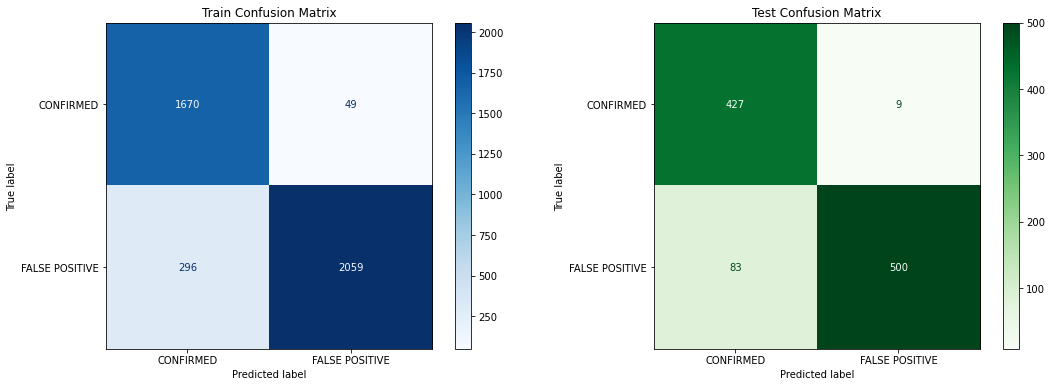

In [63]:
gnb_pipe = Pipeline([('ss', StandardScaler()),
                     ('gnb', GaussianNB())])
gnb_model = run_class_model(gnb_pipe, X_train_r, y_train_r, X_test_r, y_test_r)

### GNB Results

* Performs better than Logistic but worse than KNN

## Random Forest Classifer

In [64]:
rf_pipe = Pipeline([('rb', RobustScaler()),
                    ('RF', RandomForestClassifier(random_state=40521))])
rf_grid = [{'RF__max_depth': [2,11],
            'RF__min_samples_split': [3,7],
            'RF__min_samples_leaf': [3,7],
            'RF__oob_score': [True,False],
           }]

In [65]:
gs_rf = GridSearchCV(estimator = rf_pipe,
                     param_grid = rf_grid,
                     scoring = 'accuracy',
                     cv = 3)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.98      0.99      0.99      1719
FALSE POSITIVE       0.99      0.99      0.99      2355

      accuracy                           0.99      4074
     macro avg       0.99      0.99      0.99      4074
  weighted avg       0.99      0.99      0.99      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.96      0.96      0.96       436
FALSE POSITIVE       0.97      0.97      0.97       583

      accuracy                           0.96      1019
     macro avg       0.96      0.96      0.96      1019
  weighted avg       0.96      0.96      0.96      1019

********************************************************



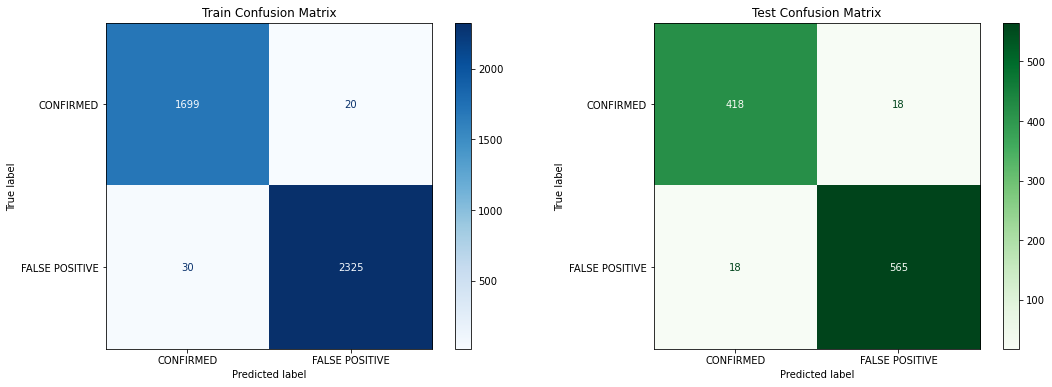

In [66]:
gsrf_model = run_class_model(gs_rf, X_train_r, y_train_r, X_test_r, y_test_r)

In [67]:
gsrf_model.best_params_

{'RF__max_depth': 11,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 3,
 'RF__oob_score': True}

In [121]:
accuracy_score(y_test_r,gsrf_model.predict(X_test_r))

0.9646712463199215

### RF Results

* Best performing model so far

## ADA Boost

In [69]:
ada_pipe = Pipeline([('rb', RobustScaler()),
                    #('ss', StandardScaler()),
                    ('ada', AdaBoostClassifier(random_state=40521))])
ada_grid = [{'ada__learning_rate': [1.5,1.0],
             'ada__n_estimators': [150,100,50]
           }]

In [70]:
gs_ada = GridSearchCV(estimator = ada_pipe,
                     param_grid = ada_grid,
                     scoring = 'accuracy',
                     cv = 3)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.99      0.99      0.99      1719
FALSE POSITIVE       1.00      0.99      0.99      2355

      accuracy                           0.99      4074
     macro avg       0.99      0.99      0.99      4074
  weighted avg       0.99      0.99      0.99      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.95      0.96      0.95       436
FALSE POSITIVE       0.97      0.96      0.96       583

      accuracy                           0.96      1019
     macro avg       0.96      0.96      0.96      1019
  weighted avg       0.96      0.96      0.96      1019

********************************************************



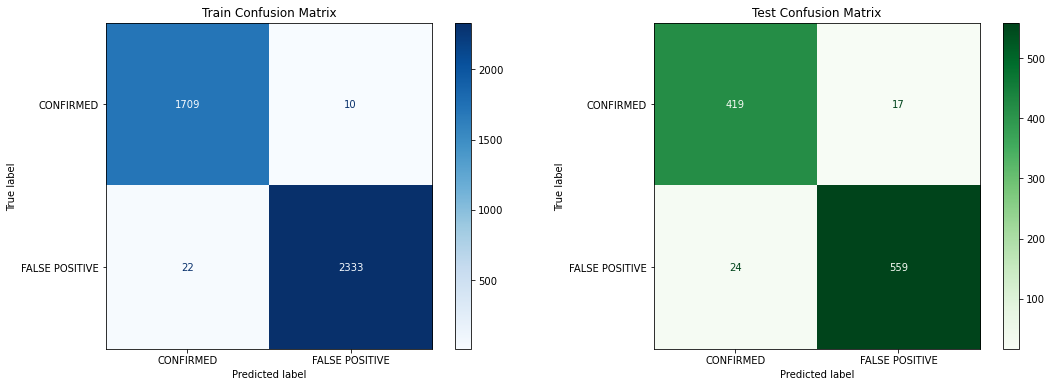

In [71]:
gsada_model = run_class_model(gs_ada, X_train_r, y_train_r, X_test_r, y_test_r)

In [72]:
gsada_model.best_params_

{'ada__learning_rate': 1.0, 'ada__n_estimators': 150}

### ADA Boost Results

* Performs well too, similar to Random Forest.

## Gradient Boost

In [73]:
gra_pipe = Pipeline([('rb', RobustScaler()),
                    ('gra', GradientBoostingClassifier(random_state=40521,subsample=.65))])
gra_grid = [{'gra__learning_rate': [1.5,1.0],
             'gra__n_estimators': [150,100,50]
           }]

In [74]:
gs_gra = GridSearchCV(estimator = gra_pipe,
                     param_grid = gra_grid,
                     scoring = 'accuracy',
                     cv = 3)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.98      0.98      0.98      1719
FALSE POSITIVE       0.98      0.99      0.99      2355

      accuracy                           0.98      4074
     macro avg       0.98      0.98      0.98      4074
  weighted avg       0.98      0.98      0.98      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.94      0.93      0.93       436
FALSE POSITIVE       0.95      0.95      0.95       583

      accuracy                           0.94      1019
     macro avg       0.94      0.94      0.94      1019
  weighted avg       0.94      0.94      0.94      1019

********************************************************



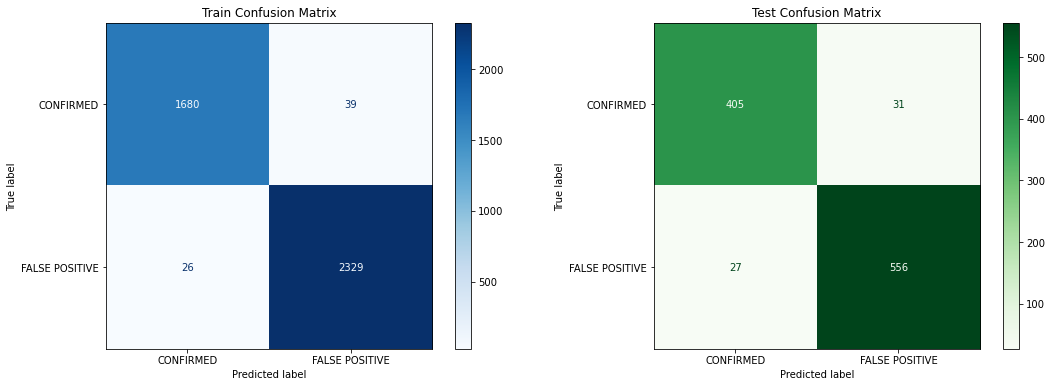

In [75]:
gsgra_model = run_class_model(gs_gra, X_train_r, y_train_r, X_test_r, y_test_r)

In [76]:
gsgra_model.best_params_

{'gra__learning_rate': 1.0, 'gra__n_estimators': 150}

### Gradient Boost Results

* Does not perform as well as Random Forest or ADA boost

## XG Boost

In [127]:
test_xg_pipe = Pipeline([('rb', RobustScaler()),
                    ('xg', xgb.XGBClassifier(random_state=40521,min_child_weight=3,subsample=.65))])

In [133]:
test_xg_grid = [{'xg__learning_rate': [2,1.5,1.0],
                 'xg__n_estimators': [150,100,50],
                 'xg__gamma': [.5,1,2],
                 'xg__max_depth': [1,2],
                 'xg__colsample_bytree': [.6,.7],
           }]

In [134]:
gs_xg_test = GridSearchCV(estimator = test_xg_pipe,
                     param_grid = test_xg_grid,
                     scoring = 'accuracy',
                     cv = 3)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.99      0.99      0.99      1719
FALSE POSITIVE       0.99      0.99      0.99      2355

      accuracy                           0.99      4074
     macro avg       0.99      0.99      0.99      4074
  weighted avg       0.99      0.99      0.99      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.94      0.96      0.95       436
FALSE POSITIVE       0.97      0.96      0.96       583

      accuracy                           0.96      1019
     macro avg       0.96      0.96      0.96      1019
  weighted avg       0.96      0.96      0.96      1019

********************************************************



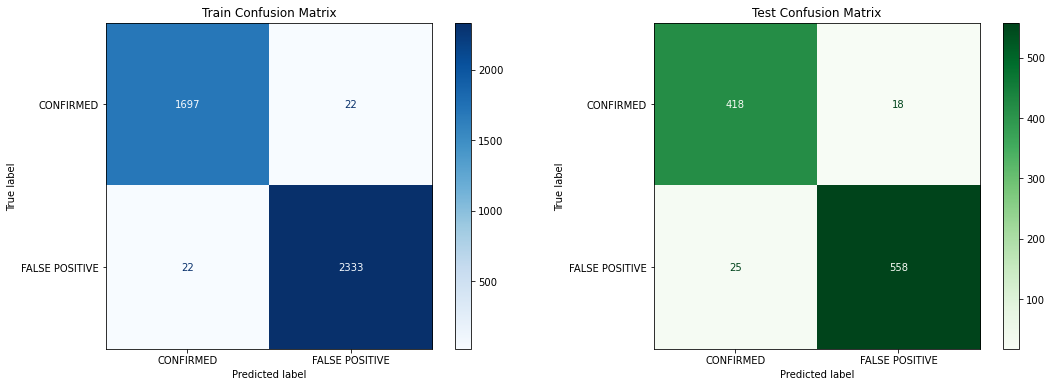

In [135]:
gsxg_model = run_class_model(gs_xg_test, X_train_r, y_train_r, X_test_r, y_test_r)

In [136]:
gsxg_model.best_params_

{'xg__colsample_bytree': 0.6,
 'xg__gamma': 1,
 'xg__learning_rate': 1.0,
 'xg__max_depth': 2,
 'xg__n_estimators': 50}

In [137]:
accuracy_score(y_test_r,gsxg_model.predict(X_test_r))

0.957801766437684

### XG Boost Results

* Also appears overfit, but test data remains well and balanced

## Support Vector Machines

In [83]:
svm_pipe = Pipeline([#('rb', RobustScaler()),
                     ('mms',MinMaxScaler(feature_range=(-1,1))),
                     ('ss', StandardScaler()),
                     ('svm', SVC(random_state=40521))])
svm_grid = [{'svm__C': [1.5,1.0,.5],
             'svm__gamma': ['scale','auto'],
             'svm__kernel': ['linear','poly','rbf','sigmoid'],
           }]

In [84]:
gs_svm = GridSearchCV(estimator = svm_pipe,
                     param_grid = svm_grid,
                     scoring = 'accuracy',
                     cv = 3)

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.93      0.94      0.93      1719
FALSE POSITIVE       0.96      0.94      0.95      2355

      accuracy                           0.94      4074
     macro avg       0.94      0.94      0.94      4074
  weighted avg       0.94      0.94      0.94      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.91      0.94      0.93       436
FALSE POSITIVE       0.96      0.93      0.94       583

      accuracy                           0.94      1019
     macro avg       0.93      0.94      0.93      1019
  weighted avg       0.94      0.94      0.94      1019

********************************************************



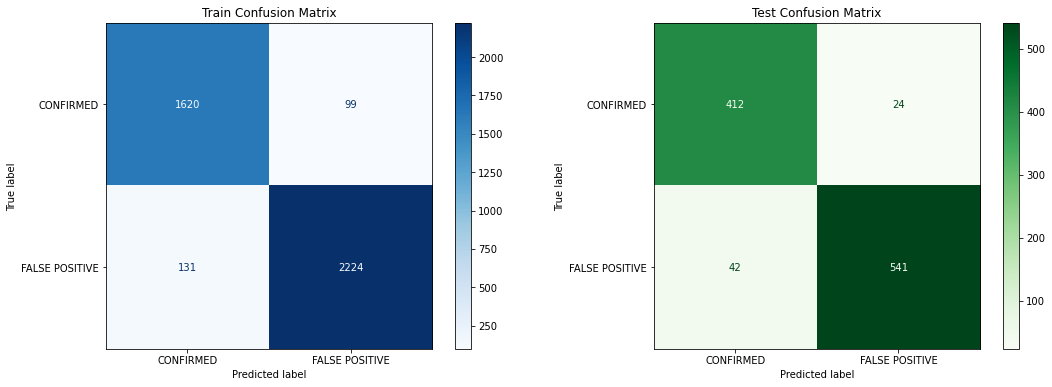

In [85]:
gssvm_model = run_class_model(gs_svm, X_train_r, y_train_r, X_test_r, y_test_r)

In [86]:
gssvm_model.best_params_

{'svm__C': 1.5, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}

### SVM Results

* Performs slightly worse than the others
* Difficult to hypertune parameters due to long run times

# Table of Classification Results

In [138]:
all_models = [gslog_model,gsknn_model,gnb_model,gsrf_model,gsada_model,gsgra_model,gsxg_model,gssvm_model] #add new model names here
model_names = ['Logistic Regression',
               'K Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Random Forest',
               'ADA Boost',
               'Gradient Boost',
               'XG Boost',
               'Support Vector Machines'
              ]

In [139]:
model_table = pd.DataFrame({"Models": model_names})

In [140]:
model_table['Accuracy'] = [round(accuracy_score(y_test_r,all_models[m].predict(X_test_r)),4) for m in range(len(all_models))]

In [141]:
model_table['F1 Score'] = [round(f1_score(y_test_r,all_models[m].predict(X_test_r),pos_label='CONFIRMED'),4) for m in range(len(all_models))]

In [142]:
model_table['Precision'] = [round(precision_score(y_test_r,all_models[m].predict(X_test_r),pos_label='CONFIRMED'),4) for m in range(len(all_models))]

In [143]:
model_table['Recall'] = [round(recall_score(y_test_r,all_models[m].predict(X_test_r),pos_label='CONFIRMED'),4) for m in range(len(all_models))]

In [144]:
model_table.sort_values(by="Accuracy")

,Models,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.8901,0.8721,0.8682,0.8761
2,Gaussian Naive Bayes,0.9097,0.9027,0.8373,0.9794
1,K Nearest Neighbors,0.9244,0.9157,0.8763,0.9587
7,Support Vector Machines,0.9352,0.9258,0.9075,0.9450
5,Gradient Boost,0.9431,0.9332,0.9375,0.9289
6,XG Boost,0.9578,0.9511,0.9436,0.9587
4,ADA Boost,0.9598,0.9534,0.9458,0.9610
3,Random Forest,0.9647,0.9587,0.9587,0.9587


# Best Model - Random Forest Rerun

********************************************************

     Classification Report: Train

                precision    recall  f1-score   support

     CONFIRMED       0.98      0.99      0.99      1719
FALSE POSITIVE       0.99      0.99      0.99      2355

      accuracy                           0.99      4074
     macro avg       0.99      0.99      0.99      4074
  weighted avg       0.99      0.99      0.99      4074

********************************************************

     Classification Report: Test

                precision    recall  f1-score   support

     CONFIRMED       0.96      0.96      0.96       436
FALSE POSITIVE       0.97      0.97      0.97       583

      accuracy                           0.96      1019
     macro avg       0.96      0.96      0.96      1019
  weighted avg       0.96      0.96      0.96      1019

********************************************************



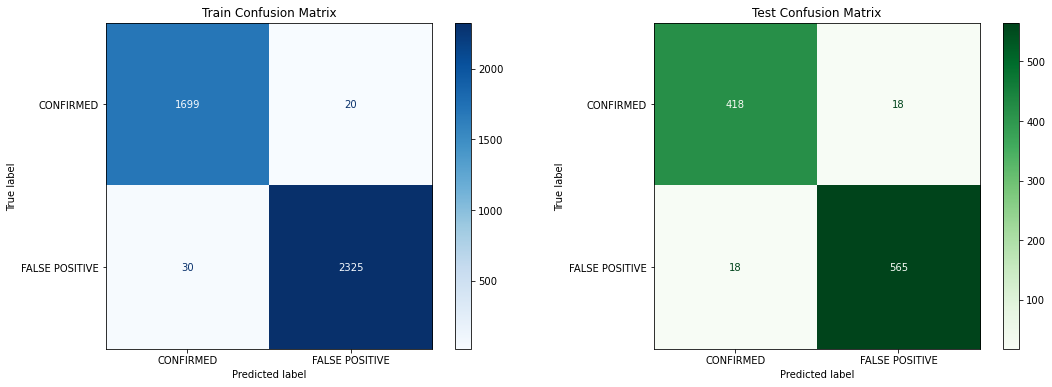

In [94]:
gsrf_model = run_class_model(gs_rf, X_train_r, y_train_r, X_test_r, y_test_r)

In [95]:
gsrf_model.best_params_

{'RF__max_depth': 11,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 3,
 'RF__oob_score': True}

## Most Important Features

In [96]:
gsrf_model.best_estimator_.named_steps["RF"].feature_importances_

array([0.02132519, 0.        , 0.04537372, 0.01609932, 0.03796122,
       0.0113826 , 0.11547089, 0.02126385, 0.0479246 , 0.01948668,
       0.02989431, 0.06794475, 0.03224734, 0.06299863, 0.09390651,
       0.01697461, 0.00345279, 0.00102787, 0.00528168, 0.00636405,
       0.00605211, 0.01986917, 0.00405767, 0.00303346, 0.11261167,
       0.00429279, 0.00342672, 0.02674703, 0.02134808, 0.0182259 ,
       0.01195475, 0.04636913, 0.06563091])

In [97]:
features = pd.DataFrame(columns=['Features','Coef'])

In [98]:
features['Features'] = X_r.columns

In [99]:
features['Coef']= gsrf_model.best_estimator_.named_steps["RF"].feature_importances_

In [100]:
features.sort_values(by='Coef').tail(5)

,Features,Coef
32,koi_dikco_mdec,0.065631
11,koi_dor,0.067945
14,koi_count,0.093907
24,koi_fwm_stat_sig,0.112612
6,koi_prad,0.115471


In [101]:
features.sort_values(by='Coef').head(5)

,Features,Coef
1,koi_eccen,0.000000
17,koi_quarters,0.001028
23,koi_rmag,0.003033
26,koi_fwm_sdec,0.003427
16,koi_tce_plnt_num,0.003453


In [102]:
best_features = ['koi_prad','koi_count','koi_dor']

## RePlot the distrubutions and relationship with the target variable

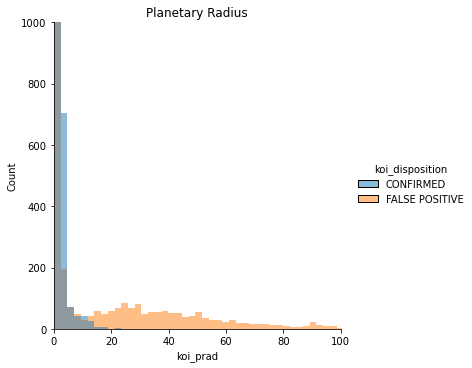

In [146]:
sns.displot(data=df_revised,x='koi_prad',hue='koi_disposition').set(xlim=(0,100),ylim=(0,1000),title="Planetary Radius");

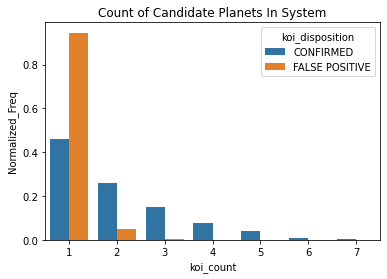

In [150]:
sns.barplot(data=df_revised['koi_count']
 .groupby(df_revised['koi_disposition'])
 .value_counts(normalize=True)
 .rename("Normalized_Freq")
 .reset_index(),x='koi_count',y='Normalized_Freq',hue='koi_disposition').set(title="Count of Candidate Planets In System");

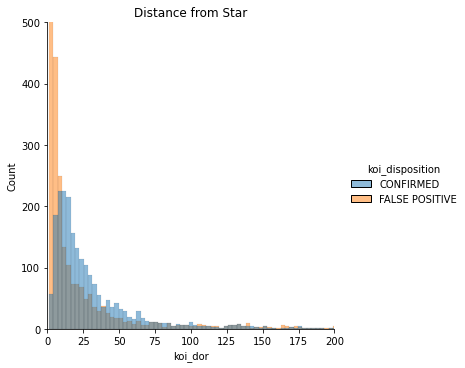

In [148]:
sns.displot(data=df_revised,x='koi_dor',hue='koi_disposition').set(xlim=(0,200),ylim=(0,500),title = "Distance from Star");

## Important Feature Descriptions

# Using model to predict candidates

In [106]:
candidates_revised

,kepoi_name,koi_disposition,koi_pdisposition,koi_period,koi_eccen,koi_impact,koi_duration,koi_depth,koi_srho,koi_prad,...,koi_rmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dikco_mra,koi_dikco_mdec
2,K00753.01,CANDIDATE,CANDIDATE,19.899140,0.0,0.969,1.78220,10800.0,7.29555,14.60,...,15.390,0.278,19.800321,48.134120,-0.021,-0.038,0.000700,0.000600,0.002,-0.027
37,K00760.01,CANDIDATE,CANDIDATE,4.959319,0.0,0.831,2.22739,9800.0,1.46169,12.21,...,15.209,0.705,19.477804,48.727566,0.000,-0.086,0.000110,-0.000070,-0.021,-0.077
58,K00777.01,CANDIDATE,CANDIDATE,40.419504,0.0,0.911,3.36200,6260.0,1.89549,7.51,...,15.463,0.027,19.621127,50.080316,0.090,0.310,0.000600,-0.001100,-0.049,-0.021
62,K00780.02,CANDIDATE,CANDIDATE,7.240661,0.0,1.198,0.55800,556.0,8.66412,19.45,...,15.283,0.058,19.588885,50.229960,-0.100,-1.400,0.000160,0.000750,0.080,-0.380
63,K00115.03,CANDIDATE,CANDIDATE,3.435916,0.0,0.624,3.13300,23.2,0.47024,0.55,...,12.732,0.858,19.192473,46.276160,-0.600,-0.300,0.000012,-0.000003,-0.110,-0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,K08297.01,CANDIDATE,CANDIDATE,229.957537,0.0,1.175,7.59000,400.0,0.04708,43.78,...,10.435,0.088,19.731896,50.771610,1.120,0.470,-0.000310,-0.000130,-0.290,-0.900
9542,K07982.01,CANDIDATE,CANDIDATE,376.379890,0.0,0.305,13.99000,1140.0,1.10893,3.26,...,15.598,0.952,19.440301,46.973120,-0.100,-0.600,0.000000,0.000400,1.120,-0.770
9552,K08193.01,CANDIDATE,CANDIDATE,367.947848,0.0,0.902,4.24900,1300.0,5.58716,3.72,...,15.656,0.877,19.848905,46.961420,-1.000,-0.400,0.001000,0.000000,0.070,-0.310
9560,K07986.01,CANDIDATE,CANDIDATE,1.739849,0.0,0.043,3.11400,48.5,0.50770,0.72,...,14.687,0.089,19.100625,47.163770,0.100,2.000,-0.000018,-0.000074,0.500,-0.180


In [107]:
predictions = gsxg_model.best_estimator_.predict(candidates_revised.drop(['kepoi_name','koi_disposition','koi_pdisposition'],axis=1))

In [108]:
candidates_predictions = candidates_revised.copy()

In [109]:
candidates_predictions['Predictions'] = predictions

In [110]:
candidates_predictions.Predictions.value_counts()

CONFIRMED         916
FALSE POSITIVE    673
Name: Predictions, dtype: int64

In [111]:
949/(949+640)

0.5972309628697294

In [112]:
candidates_predictions.loc[:,['kepoi_name','koi_disposition','Predictions']].head()

,kepoi_name,koi_disposition,Predictions
2,K00753.01,CANDIDATE,FALSE POSITIVE
37,K00760.01,CANDIDATE,CONFIRMED
58,K00777.01,CANDIDATE,CONFIRMED
62,K00780.02,CANDIDATE,FALSE POSITIVE
63,K00115.03,CANDIDATE,CONFIRMED


# Final Results and Conclusion

1. Best performing classifier model for this dataset is XG Boost with an accuracy of 97%.  However, other models performed just    as well.
2. Important features in determining the disposition include:
    a. Distance of Planet from Star (7%)
    b. Number of planet candidates in the system (9%)
    c. Planetary Radius (11%)
3. 33 features and ~5,100 rows of data were used in training the model
    a. Of these data points, ~2,900 were false positive, 2,200 were confirmed exoplanets
4. ~1,600 candidate exoplanets were run through the model
    a. Of these planets, 60% are predicted to be confirmed exoplanets
    b. Additional data should be collected on these predictions and focus should be placed on these. 